# 2
> GDL

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]


# geometric deep learning models 

## <font color="green">2.1 ... tensors in pytorch</font>

In [ ]:
pip install torch --upgrade

     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:38tcmalloc: large alloc 1147494400 bytes == 0x5560b83a0000 @  0x7fe0f2a0d615 0x55607f4604cc 0x55607f54047a 0x55607f4632ed 0x55607f554e1d 0x55607f4d6e99 0x55607f4d19ee 0x55607f464bda 0x55607f4d6d00 0x55607f4d19ee 0x55607f464bda 0x55607f4d3737 0x55607f555c66 0x55607f4d2daf 0x55607f555c66 0x55607f4d2daf 0x55607f555c66 0x55607f4d2daf 0x55607f465039 0x55607f4a8409 0x55607f463c52 0x55607f4d6c25 0x55607f4d19ee 0x55607f464bda 0x55607f4d3737 0x55607f4d19ee 0x55607f464bda 0x55607f4d2915 0x55607f464afa 0x55607f4d2c0d 0x55607f4d19ee
     |████████████████████████████████| 881.9 MB 18 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.utils.data as data

In [ ]:
torch.manual_seed(42)
print("Using torch", torch.__version__)

Using torch 1.10.0+cu102


### <font color="teal">... helper classes and functions </font>

In [ ]:
from PIL import Image
from torchvision import transforms

___
#### class ... `more_tens`  

In [ ]:
#@title
class more_tens():

    def __init__(self, 
                 obj, 
                 name, 
                 has_RGB_shape = False, 
                 has_batch_dim = False):

        self.obj = obj

        self.name = name

        self.ty = type( self.obj )

        self.name = name

        self.has_RGB_shape = has_RGB_shape 

        self.has_batch_dim = has_batch_dim

    def display_rgb( self, pil_image, size ):

        fig = plt.figure( figsize = (size, size) )

        f_rows, f_cols = 1, 1

        fig.add_subplot( f_rows, f_cols, 1 )

        plt.tick_params( left = False, bottom = False )

        plt.axis('off')

        plt.imshow(pil_image)

    def display_tens( self, tens, size ):

        display_size = size

        if tens.ndim == 1:

            display_obj = tens[None,:]

            display_obj = display_obj.float()

            viz_tens(display_obj, display_size)

        elif tens.ndim == 2:

            display_obj = tens

            display_obj = display_obj.float()

            viz_tens(display_obj, display_size)

    def display_np( self, arr, size ):

        self.display_tens( torch.from_numpy( arr ), size )

    

    def scan_img(self, image):

        print(type(image), 
              "\n", 
              "format:  ", image.format, 
              "\n", "shape:  ", image.size, 
              "\n", "mode:  ", image.mode)
        

    def set_GOE(self, N):
        normalize = 1 / np.sqrt(2*N)
        shape = (N,N)
        gaussian_matrix = normalize * torch.randn(shape)
        return( gaussian_matrix + torch.transpose(gaussian_matrix,0,1)) 

___

In [ ]:
!pip install tabletext

  Created wheel for tabletext: filename=tabletext-0.1-py3-none-any.whl size=6022 sha256=384237e663e1e0614b9290fcd435e0e01872c35657dbc01661714520ea433992
  Stored in directory: /root/.cache/pip/wheels/cc/ae/ab/697f6cd9887c63663da889f796c2c7ea280bc407b16f6fd081
Successfully built tabletext


In [ ]:
from tabletext import to_text

___

#### method ... `info`

_can currently handle 1- and 2-tensors_

In [ ]:
def info(obj, name):

    ty_tens = type( torch.tensor([2]) )

    ty_np = type( np.array([2]) )

    delim = "   "

    if obj.ndim == 1:

        display_obj = obj[None,:]

    elif obj.ndim == 2:

        display_obj = obj

    if type(obj) == ty_tens:

        print( "tensor", delim, name, "\n" )

        print( delim, "num. dims   ", delim, obj.ndim )

        print( delim, "num. entries", delim, np.array( obj ).size )

        print( delim, "shape       ", delim, np.array( obj.size() ) )

    if type(obj) == ty_np:

        print( "np array", delim, name, "\n" )

        print( delim, "number of dimensions", obj.ndim )

        print( delim, "number of entries", delim, obj.size )

        print( delim, "shape", delim, obj.shape )

    print("\n")

    print( to_text( display_obj.tolist() ) )

    print("\n\n")

___

___

#### method ... `viz_tens`

args

* `tens`

* `display_size`

In [ ]:
#@title
def viz_tens( tens, display_size = 2 ):

    size = display_size

    if tens.ndim == 1:

        display_obj = tens[None,:]

        display_obj = display_obj.float()

    elif tens.ndim == 2:

        display_obj = tens

        display_obj = display_obj.float()

    pil_image = transforms.ToPILImage()( display_obj ).convert("RGB")

    fig = plt.figure( figsize = (size, size) )

    f_rows, f_cols = 1, 1

    fig.add_subplot( f_rows, f_cols, 1 )

    plt.tick_params( left = False, bottom = False )

    plt.axis('off')

    plt.imshow(pil_image)

___

___

#### method ... `viz_tens_list`

args

* `list_of_tensors`

* `display_size = 6`

In [ ]:
def viz_tens_list( list_of_tensors, display_size = 6 ):

    size = display_size

    image_list = [ transforms.ToPILImage()(x).convert("RGB") for x in list_of_tensors ]

    tensor_list = [ transforms.ToTensor()(image) for image in image_list]

    grid = torchvision.utils.make_grid( tensor_list, padding = 2, pad_value = 1.0 )

    grid_pil = transforms.ToPILImage()(grid).convert("RGB")

    fig = plt.figure( figsize = (size, size) )

    f_rows, f_cols = 1, 1

    fig.add_subplot( f_rows, f_cols, 1 )

    plt.tick_params( left = False, bottom = False )

    plt.axis('off')

    plt.imshow(grid_pil)

___

### <font color="teal">... initializing tensors</font>

Tensors are similar to NumPy's `ndarrays`, except that tensors can run on GPUs or other hardware accelerators. Tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors are also optimized for automatic differentiation


Here are some ways they can be initialized in torch.

1. from lists: $\quad$ `X_1 = torch.tensor( list_object )`

2. from a numpy array $\quad$ `X_2 = torch.from_numpy( array_object )`

3. with random or constant values, of a given shape. For example,

    a. entries all ones: $\quad$ `X_3_a = torch.ones( shape )`

    b. entries all zeros $\quad$ `X_3_b = torch.zeros( shape )`

    c. entries are i.i.d. $\text{Unif}(0,1)$ $\quad$ `X_3_c = torch.rand( shape )`

    d. entries are i.i.d. standard normal $\quad$ `X_3_d = torch.randn( shape )`

    e. from values stored in memory $\quad$ `X_3_e = torch.Tensor( shape )`
    
    f. a list of consecutive integers between $N$ and $M$, inclusive, as tensor object $\quad$ `X_3_f = torch.arange(N,M)`

#### ... 1.   from lists

tensor     X1 

    num. dims        1
    num. entries     2
    shape            [2]


┌───┬───┐
│ 2 │ 3 │
└───┴───┘





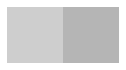

In [ ]:
X_1 = torch.tensor( [ 2, 3 ] )
info(X_1, "X1")
viz_tens( 25 * X_1 ) # the factor there to help distinguish values

#### ... 2. from numpy

tensor     'X two' 

    num. dims        1
    num. entries     3
    shape            [3]


┌───┬───┬───┐
│ 2 │ 3 │ 4 │
└───┴───┴───┘





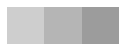

In [ ]:
X_2 = torch.from_numpy( np.array( [ 2, 3, 4 ] ) )
info(X_2, "'X two'")
viz_tens( 25 * X_2 )

The next examples allow a shape to be provided as an argument. 

In [ ]:
shape_dict = {}

shape_dict["i"] = ( 3 )

shape_dict["ii"] = ( 2, 3 )

shape_dict["iii"] = ( 2, 3, )

#### ... 3. (a) ones of given shape

tensor     'X three (a) i' 

    num. dims        1
    num. entries     3
    shape            [3]


┌─────┬─────┬─────┐
│ 1.0 │ 1.0 │ 1.0 │
└─────┴─────┴─────┘



tensor     'X three (a) ii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌─────┬─────┬─────┐
│ 1.0 │ 1.0 │ 1.0 │
├─────┼─────┼─────┤
│ 1.0 │ 1.0 │ 1.0 │
└─────┴─────┴─────┘



tensor     'X three (a) iii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌─────┬─────┬─────┐
│ 1.0 │ 1.0 │ 1.0 │
├─────┼─────┼─────┤
│ 1.0 │ 1.0 │ 1.0 │
└─────┴─────┴─────┘





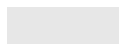

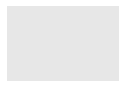

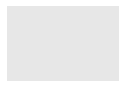

In [ ]:
for key in shape_dict:
    s = key
    X_3_a = torch.ones(shape_dict[s])
    info(X_3_a, "'X three (a)'"[:-1] + " " + s + "'" )
    viz_tens( 25 * X_3_a )

#### ... 3. (b) zeros of given shape

tensor     'X three (a) i' 

    num. dims        1
    num. entries     3
    shape            [3]


┌─────┬─────┬─────┐
│ 0.0 │ 0.0 │ 0.0 │
└─────┴─────┴─────┘



tensor     'X three (a) ii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌─────┬─────┬─────┐
│ 0.0 │ 0.0 │ 0.0 │
├─────┼─────┼─────┤
│ 0.0 │ 0.0 │ 0.0 │
└─────┴─────┴─────┘



tensor     'X three (a) iii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌─────┬─────┬─────┐
│ 0.0 │ 0.0 │ 0.0 │
├─────┼─────┼─────┤
│ 0.0 │ 0.0 │ 0.0 │
└─────┴─────┴─────┘





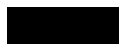

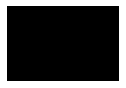

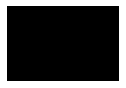

In [ ]:
for key in shape_dict:
    s = key
    X_3_b = torch.zeros(shape_dict[s])
    info(X_3_b, "'X three (a)'"[:-1] + " " + s + "'" )
    viz_tens( 25 * X_3_b )

#### ... 3. (c) i.i.d. uniform of given shape

tensor     'X three (c) i' 

    num. dims        1
    num. entries     3
    shape            [3]


┌─────────────────────┬─────────────────────┬─────────────────────┐
│ 0.20829910039901733 │ 0.32885128259658813 │ 0.10535955429077148 │
└─────────────────────┴─────────────────────┴─────────────────────┘



tensor     'X three (c) ii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌────────────────────┬─────────────────────┬────────────────────┐
│ 0.9192349314689636 │   0.400767982006073 │ 0.9301983714103699 │
├────────────────────┼─────────────────────┼────────────────────┤
│ 0.6557910442352295 │ 0.07660150527954102 │  0.846017599105835 │
└────────────────────┴─────────────────────┴────────────────────┘



tensor     'X three (c) iii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───────────────────────┬────────────────────┬─────────────────────┐
│   0.36242759227752686 │ 0.3083369731903076 │ 0.08496475219726562 │
├────────

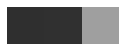

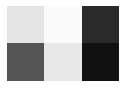

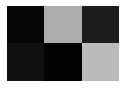

In [ ]:
for key in shape_dict:
    s = key
    X_3_c = torch.rand(shape_dict[s])
    info(X_3_c, "'X three (c)'"[:-1] + " " + s + "'" )
    viz_tens( 25 * X_3_c )


#### ... 3. (d) i.i.d. standard normal of given shape

tensor     'X three (d) i' 

    num. dims        1
    num. entries     3
    shape            [3]


┌────────────────────┬────────────────────┬────────────────────┐
│ 1.3849544525146484 │ -2.475163221359253 │ -0.931602954864502 │
└────────────────────┴────────────────────┴────────────────────┘



tensor     'X three (d) ii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌──────────────────────┬─────────────────────┬──────────────────────┐
│ -0.13348686695098877 │ 0.34148848056793213 │ -0.07157137989997864 │
├──────────────────────┼─────────────────────┼──────────────────────┤
│ -0.09089037775993347 │ -1.3296922445297241 │   -0.542582631111145 │
└──────────────────────┴─────────────────────┴──────────────────────┘



tensor     'X three (d) iii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌─────────────────────┬──────────────────────┬─────────────────────┐
│  0.5470984578132629 │   0.6430637240409851 │ -0.7904810905456543 

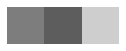

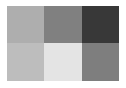

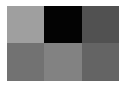

In [ ]:
for key in shape_dict:
    s = key
    X_3_d = torch.randn(shape_dict[s])
    info(X_3_d, "'X three (d)'"[:-1] + " " + s + "'" )
    viz_tens( 25 * X_3_d )

#### ... 3. (f) sequence

In [ ]:
X_3_f = torch.arange(10,20) 
info(X_3_f, "'X three (f)'")
viz_tens( 25 * X_3_f ) # note the modular arith. being performed automatically

tensor     'X three (f)' 

    num. dims        1
    num. entries     10
    shape            [10]


┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│ 10 │ 11 │ 12 │ 13 │ 14 │ 15 │ 16 │ 17 │ 18 │ 19 │
└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘





### <font color="teal">numpy objects and tensors</font>

Tensors can be converted to numpy arrays, and numpy arrays back to tensors.
To transform a numpy array into a tensor, we can use the function `torch.from_numpy`, and we use `np.array` for the other direction.

The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU.

In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand.
Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other. 

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### <font color="teal">... tensor operations</font>

Most operations existing in numpy also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#).

* Each torch operation can be run on the GPU.

* By default, tensors are created on the CPU. Unless we are using a package like `pytorch-lightning`, we need to explicitly move tensors to the GPU using the `.to` method, after checking GPU availability. 

* Copying large tensors across devices can be expensive in terms of time and memory.


#### ... adding tensors

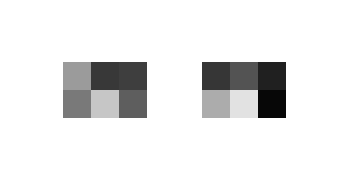

In [ ]:
X_1, X_2 = torch.rand(2,3), torch.rand(2,3)

viz_tens_list( [ X_1, X_2 ] )

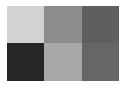

In [ ]:
Y = X_1 + X_2
viz_tens(Y) 

#### ... stacking tensors

In [ ]:
X_1, X_2 = torch.arange(5,10), torch.arange(10,15)

info(X_1, "X 1")

info(X_2, "X 2")

tensor     X 1 

    num. dims        1
    num. entries     5
    shape            [5]


┌───┬───┬───┬───┬───┐
│ 5 │ 6 │ 7 │ 8 │ 9 │
└───┴───┴───┴───┴───┘



tensor     X 2 

    num. dims        1
    num. entries     5
    shape            [5]


┌────┬────┬────┬────┬────┐
│ 10 │ 11 │ 12 │ 13 │ 14 │
└────┴────┴────┴────┴────┘





In [ ]:
Y = torch.stack([X_1, X_2], dim = 0)
info(Y, "Y")

tensor     Y 

    num. dims        2
    num. entries     10
    shape            [2 5]


┌────┬────┬────┬────┬────┐
│  5 │  6 │  7 │  8 │  9 │
├────┼────┼────┼────┼────┤
│ 10 │ 11 │ 12 │ 13 │ 14 │
└────┴────┴────┴────┴────┘





#### ... in-place operations

Operations that store the result into the operand are called _in-place_. They are  usually marked with a underscore postfix, e.g. "`add_`" instead of "`add`". The operation `X.copy_(Y)` will change `X`.

Calling `x1 + x2` creates a new tensor containing the sum of the two inputs.
However, we can also use in-place operations that are applied directly on the memory of a tensor.
We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation.
An example is shown below:

In [ ]:
X_1, X_2 = torch.rand(2, 3), torch.rand(2, 3)
print("\t","before", "\n")
info(X_1, "'X one'")
info(X_2, "'X two'")

print("\n\n")

X_2.add_(X_1)
print("\t","after","\n")
info(X_1, "'X one'")
info(X_2, "'X two'")

	 before 

tensor     'X one' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌────────────────────┬────────────────────┬────────────────────┐
│ 0.6161253452301025 │ 0.7582958936691284 │ 0.5906646847724915 │
├────────────────────┼────────────────────┼────────────────────┤
│ 0.3219376802444458 │ 0.7609710693359375 │ 0.7627565860748291 │
└────────────────────┴────────────────────┴────────────────────┘



tensor     'X two' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌────────────────────┬─────────────────────┬─────────────────────┐
│ 0.6869636178016663 │ 0.41213929653167725 │ 0.36759936809539795 │
├────────────────────┼─────────────────────┼─────────────────────┤
│ 0.5534904599189758 │  0.4116729497909546 │ 0.35099947452545166 │
└────────────────────┴─────────────────────┴─────────────────────┘






	 after 

tensor     'X one' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌────────────────────┬

> In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged. 

#### ... reshaping tensors

Another common operation aims at changing the shape of a tensor.
A tensor of size `(2,3)` can be re-organized to any other shape with the same number of elements (e.g. a tensor of size `(6)`, or `(3,2)`, ...).

In PyTorch, this reshaping operation is called `view`:

In [ ]:
X = torch.arange(6)
info(X,"X")

tensor     X 

    num. dims        1
    num. entries     6
    shape            [6]


┌───┬───┬───┬───┬───┬───┐
│ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │
└───┴───┴───┴───┴───┴───┘





In [ ]:
X = X.view(2, 3)
info(X,"X")

tensor     X 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘





#### ... transposing tensors (permuting dimensions)

In [ ]:
X = X.permute(1,0)
info(X,"X with 0th and 1st dimensions permuted")

tensor     X with 0th and 1st dimensions permuted 

    num. dims        2
    num. entries     6
    shape            [3 2]


┌───┬───┐
│ 0 │ 3 │
├───┼───┤
│ 1 │ 4 │
├───┼───┤
│ 2 │ 5 │
└───┴───┘





In [ ]:
X = X.T
info(X, "X transposed again")

tensor     X transposed again 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘





#### ... numpy-like indexing and slicing

In [ ]:
X = torch.rand( 4,4 )
info( X, "X" )
info( X[0], "first row of X" )
info( X[:,0], "first column of X" )
info( X[...,-1], "last column of X" )
info( X[:2, -1], "First two rows, last column")
info( X[1:3, :], "Middle two rows" )

tensor     X 

    num. dims        2
    num. entries     16
    shape            [4 4]


┌───────────────────────┬──────────────────────┬─────────────────────┬──────────────────────┐
│ 0.0025978684425354004 │    0.834635317325592 │  0.8788173198699951 │   0.6822240948677063 │
├───────────────────────┼──────────────────────┼─────────────────────┼──────────────────────┤
│   0.15136289596557617 │ 0.006530046463012695 │ 0.09391051530838013 │   0.8728501200675964 │
├───────────────────────┼──────────────────────┼─────────────────────┼──────────────────────┤
│    0.7400528788566589 │    0.920752227306366 │  0.7619349360466003 │   0.6265460848808289 │
├───────────────────────┼──────────────────────┼─────────────────────┼──────────────────────┤
│     0.495103657245636 │  0.11974698305130005 │ 0.07161390781402588 │ 0.032325685024261475 │
└───────────────────────┴──────────────────────┴─────────────────────┴──────────────────────┘



tensor     first row of X 

    num. dims        1
    num. 

In [ ]:
X[:,1] = 0
info(X, "modified X")

tensor     modified X 

    num. dims        2
    num. entries     16
    shape            [4 4]


┌─────────────────────┬─────┬────────────────────┬─────────────────────┐
│ 0.33701878786087036 │ 0.0 │ 0.8188108205795288 │  0.7308486700057983 │
├─────────────────────┼─────┼────────────────────┼─────────────────────┤
│ 0.05802798271179199 │ 0.0 │ 0.4210916757583618 │  0.9836747646331787 │
├─────────────────────┼─────┼────────────────────┼─────────────────────┤
│  0.5723287463188171 │ 0.0 │ 0.7068576216697693 │  0.3095592260360718 │
├─────────────────────┼─────┼────────────────────┼─────────────────────┤
│ 0.17637217044830322 │ 0.0 │ 0.2726491093635559 │ 0.39976662397384644 │
└─────────────────────┴─────┴────────────────────┴─────────────────────┘





#### ... other operations

Here are some ways to perform matrix multiplication:

* `torch.matmul` $\quad$ Performs the matrix product over two tensors, where the specific behavior depends on the dimensions.
If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product.
For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)).

    It can also be written as `a @ b`, similar to numpy.

* `torch.mm` $\quad$ Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))

* `torch.bmm` $\quad$ Performs the matrix product with a support batch dimension. Let `T` be a tensor of shape `(b,  n, m)`, and `R` a tensor of shape `(b, m, p)`, the output tensor is of shape `(b, n , p)`, obtained by "entry-wise" matrix multiplication along the batch dimension. 

* `torch.einsum` $\quad$ Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention.

Usually, we use `torch.matmul` or `torch.bmm`. 

In [ ]:
X, Y = torch.arange(6).view(2, 3), torch.arange(9).view(3, 3)

info(X,"X")

info(Y,"Y")


tensor     X 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘



tensor     Y 

    num. dims        2
    num. entries     9
    shape            [3 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
├───┼───┼───┤
│ 6 │ 7 │ 8 │
└───┴───┴───┘





In [ ]:
Z = torch.matmul(X,Y)
info(Z, "Z")

tensor     Z 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌────┬────┬────┐
│ 15 │ 18 │ 21 │
├────┼────┼────┤
│ 42 │ 54 │ 66 │
└────┴────┴────┘





Given a tensor `X`, the tensors `Y_1`,`Y_2`, `Y_3` computed below all have the same value:

    Y_1 = X @ X.T
    Y_2 = X.matmul(X.T)
    Y_3 = torch.rand_like(X)
    torch.matmul(X, X.T, out = Y_3)

On the other hand, `*` denotes the entrywise product of two tensors. 

In [ ]:
X = torch.arange(6).view(2, 3)
info(X,"X")

tensor     X 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘





In [ ]:
info( X * Y, "(a)")
info( X.mul(Y), "(b)")

tensor     (a) 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬────┬────┐
│ 0 │  1 │  4 │
├───┼────┼────┤
│ 9 │ 16 │ 25 │
└───┴────┴────┘



tensor     (b) 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬────┬────┐
│ 0 │  1 │  4 │
├───┼────┼────┤
│ 9 │ 16 │ 25 │
└───┴────┴────┘





You can use `torch.cat` to concatenate a sequence of tensors along a given dimension. See also `torch.stack`, another tensor joining op that is subtly different from `torch.cat`

In [ ]:
Y = torch.cat( [X, X, X], dim =1)
info(Y, "Y")

tensor     Y 

    num. dims        2
    num. entries     18
    shape            [2 9]


┌───┬───┬───┬───┬───┬───┬───┬───┬───┐
│ 0 │ 1 │ 2 │ 0 │ 1 │ 2 │ 0 │ 1 │ 2 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 3 │ 4 │ 5 │ 3 │ 4 │ 5 │ 3 │ 4 │ 5 │
└───┴───┴───┴───┴───┴───┴───┴───┴───┘





If you have a one-element tensor, for example obtained by aggregating all values of a given tensor into a single value, you can convert it to a Python numerical value using `item()`:

In [ ]:
agg = X.sum()
agg_item = agg.item() 
print(agg_item, "\t", type(agg_item))

15 	 <class 'int'>


## 2.2 ... Learning with scalar signals on a cyclic group

In the simplest setting we consider, the underlying domain is a one-dimensional grid, and the signals only have a single channel. We can identify this grid $\Omega$ with the Cayley graph of cyclic group
$$
C_n = \langle \, a : a^n = 1 \, \rangle \equiv \{ \, 1, a, a^2, \dots, a^{n-1} \, \}.
$$
It is convenient to parametrize the group, and hence the grid, through the exponent of the generator 
$$
C_n \equiv \{ 0, 1, \dots, n -1 \}
$$
as this indexing is consistent with the way most programming languages index vectors, reinterpreting the group operation as addition modulo $n$.

The vector space of single-channeled (i.e. real-valued) signals
$$
\mathcal{X}(C_n,\mathbb{R}) = \{ x : C_n \to \mathbb{R} \} ,
$$
is finite dimensional, and each $x \in \mathcal{X}(C_n, \mathbb{R})$ may be expressed as 
$$
x = 
\left[ 
\begin{matrix}
x_0\\ 
\vdots\\
\,x_{n-1}\,
\end{matrix}
\right] 
$$
with respect to some implicit coordinate system used by the computer, the _input coordinate system_. This is the same coordinate system used to express the representation $\rho$ of translation group $G \equiv C_n$, which we now describe.

Given a vector $\theta = (\theta_0 , \dots, \theta_{n-1})$, recall the associated _circulant matrix_ is the $n \times n$ matrix with entries 
$$
\mathcal{C}(\theta) := \left( \, \theta_{ (u - v) \mod n} \right)_{ 0 \, \leq \,u,\,v \, \leq n-1 } 
$$

Consider the case of $\theta_S := (0,1,0,\dots, 0)^T$, the associated circulant matrix, $\mathbf{S} := \mathbf{C}(\theta_S)$ acts on vectors by shifting the entries of vectors to the right by one position, modulo $n$. This is a shift or translation operator, which we denote $\mathbf{S}$. 

___
__Lemma__ $\quad$
A matrix is circulant if and only if it commutes with $\mathbf{S}$. Moreover, given any two vectors $\theta, \eta \in \mathbb{R}^n$, one has $\mathbf{C}(\theta) \mathbf{C}(\eta) = \mathbf{C}(\eta) \mathbf{C}(\theta)$. 

___

The importance of $\mathbf{S}$ to the present discussion is that it generates a group isomorphic to the one-dimensional translation group $C_n$. This is to say, a natural representation of $C_n = \langle \, a : a^n = 1 \, \rangle$ to consider is the group isomorphism induced by mapping the generator $a$ of $C_n$ to $\mathbf{S}$. Specifically, the representation $\rho$ of $G$ over $\mathcal{X}( C_n, \mathbb{R})$ is given by
$$
\rho ( a^j ) := \mathbf{S}^j 
$$

___

__Corollary__ $\quad$ Any $f : \mathcal{X}(C_n, \mathbb{R}) \to \mathcal{X}(C_n,\mathbb{R})$ which is linear and $C_n$-equivariant can be expressed ( in the input coordinate system ) as an $n \times n$ circulant matrix $\mathbf{C}(\theta)$ for some vector $\theta$.

___


___
___

__Example__ $\quad$ 
Our previous recipe for designing an equivariant function $F= \Phi( \mathbf{X}, \mathbf{A})$ using a local aggregation function $\varphi$. In this case, we can express
$$
\varphi ( \mathbf{x}_u, \mathbf{X}_{\mathcal{N}(u)} ) = \varphi( \mathbf{x}_{u-1}, \, \mathbf{x}_u, \, \mathbf{x}_{u+1} ),
$$
where the addition and subtraction in the indices above is understood to be modulo $n$. 

 If in addition, we insist that $\varphi$ is linear, then it has the form 
$$
 \varphi( \mathbf{x}_{u-1}, \, \mathbf{x}_u, \, \mathbf{x}_{u+1} ) = \theta_{-1} \mathbf{x}_{u-1} + \theta_0 \mathbf{x}_u + \theta_1 \mathbf{x}_{u+1},
$$
and in this case we can express $\mathbf{F} = \Phi (\mathbf{X}, \mathbf{A} )$ through the following matrix multiplication:
$$
\left[
\begin{matrix}
\theta_0 & \theta_1 & \text{ } & \text{ } & \theta_{-1} \\
\theta_{-1} & \theta_0 & \theta_1 & \text{ } &   \text{ } \\
\text{} & \ddots & \ddots & \ddots & \text{ } \\
\text{ } & \text{ } & \theta_{-1} & \theta_0 & \theta_1 \\
\theta_1 & \text{ } & \text{ } & \theta_{-1} & \theta_0 
\end{matrix} 
\right]
\left[
\begin{matrix}
\mathbf{x}_0 \\
\mathbf{x}_1 \\
\vdots \\
\,\mathbf{x}_{n-2} \, \\
\mathbf{x}_{n-1}  
\end{matrix}
\right]
$$
This special multi-diagonal structure is sometimes referred to as ``weight sharing" in the machine learning literature. 

___
___

Circulant matrices are synonymous with discrete convolutions; for $x \in \mathcal{X}(\Omega,\mathbb{R})$ and $\theta \in \mathbb{R}^n$, their _convolution_ $x \star \theta$ is defined by 
$$
( x \star \theta )_u := \sum_{v = 0}^{n-1} x_{v \mod n}\, \theta_{ (u-v) \mod n}  \, ,
$$
$$
\equiv \mathbf{C}(\theta) x 
$$


___

__Rmk__ $\quad$ This leads to an alternate, equivalent definition of convolution as a translation equivariant linear operation. Moreover by replacing translations by a more general group $G$, one can generalize convolution to settings whose domain has symmetry other than translational. 
___ 

#### `torch.nn.Conv2d`

The arguments:

* `in_channels`

* `out_channels`

* `kernel_size`

* `stride` $\quad$ controls the stride for the cross-correlation, a single number or a tuple. 

* `padding` $\quad$ controls amount of padding applied to the input. It can either be a string, `"valid"` or `"same"` or a tuple of ints giving the amount of implicit padding applied on both sides. 

* `dilation` $\quad$ controls the spacing between kernel points; "also known as the a trous algorithm

* `groups` $\quad$ controls connections between inputs and outputs. The `in_channels` and `out_channels` must be divisible by `groups`. For example,

    * At groups = 1, all inputs are convolved to all outputs

    * At groups = 2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels, and producing half the output channels, and both subsequently concatenated. 

    * At groups = `in_channels`, each input channel is convolved with its own set of filters (of size `out_channels // in_channels`)

* `bias`

* `padding_mode`,

* `device`,

* `dtype`

Let us now relate the shapes of the input and output to the parameters


| input parameter      | LaTeX symbol |
| ----------- | ----------- |
| `in_channels`      | $\text{dim}(\mathcal{C})$     |
| `out_channels`   | $\text{dim}(\mathcal{C}_1)$        |
| `kernel_size`      | $k$       |
| `stride`   | $\lambda$        |
| `padding`   | $\rho$        |
| `dilation`      | $\delta$       |
| `groups`   | $M$        



Additionally, we use $N$ for the batch size of the input, `N`. We also let $(h,w)$ denote the height-width pair describing the shape of the input signal domain. 

Correspondingly, we write $(h_1, w_1)$ for the height-width pair describing the shape of the output signal domain. 

We remark that the stride can be either integer or a $2$-tuple, whose coordinates describe the vertical and horizontal stride respectively. We still write $\lambda$ for the stride when it is a tuple, and use $\lambda_h \equiv \lambda[0]$ and $\lambda_w \equiv \lambda[1]$ to denote its first and second coordinate, in this case. Likewise, the padding and kernel size may be $2$-tuples as well, and we use similar notation to denote their entries.  

The full shape of the input to the layer includes the batch dimension, and is thus

$$
(N, \text{dim}(\mathcal{C}), H, W) \,,
$$

while the shape of the output is

$$
(N , \text{dim}(\mathcal{C}_1), H_1, W_1 )
$$

These shapes, in particular the spatial dimensions of each, are related as follows: 

$\begin{align}
H_1 &= \left\lfloor \frac{
    H + 2 \rho_h - \delta_h ( k_h -1) -1 }{\lambda_h}
\right\rfloor \\
W_1 &= \left\lfloor \frac{
    W + 2 \rho_w - \delta_w ( k_w -1) -1 }{\lambda_w}
\right\rfloor
\end{align}$,

in particular, the batch size does not have any bearing on how the shapes of tensors transform. 

The parameters to be learned are the weights $w^1$ and biases $b^1$. These are both `Tensor` objects, accessed from the layer as `Conv2d.weight` and `Conv2d.bias`. The shape of the weight tensor is

$$
\textrm{shape}(w^1) =
\left( \, \text{dim}(\mathcal{C}_1),  \, \text{dim}(\mathcal{C}) \big/ M , k_h, k_w \right)
$$

The tensor $w^1$ thus has 

$$
\textrm{size}(w^1) = \textrm{dim}(\mathcal{C}_1) \textrm{dim} (\mathcal{C}) k_h k_w \big/ M
$$

scalar entries. 

There is always the question of how to initialize weights. In the case of the `Conv2d` class, the weights are initialized to be i.i.d. $\text{Unif}( - \sqrt{ \alpha_1}, \sqrt{\alpha_1} )$ random variables, where

$$
\alpha_1 := \frac{ \textrm{dim}(\mathcal{C}_1) }{\textrm{size}(w^1)}
$$



The bias tensor is a much smaller object, we have 

$
\begin{align}
\textrm{shape}(b^1) = (\, \textrm{dim}(\mathcal{C}_1  ) \,) \, , \quad \textrm{size}(b^1) = \textrm{dim}(\mathcal{C}_1)
\end{align}
$

Despite this, we use the same initialization (with mutual independence of all random variables in discussion) for the bias entries as we did for the weights. 

## __2.2 $\quad$ A simple CNN__

We consider possibly the simplest neural network that we can construct through the above blueprint. Suppose we have a binary classification problem, with the following hypothesis space. Let $\textsf{H}_1$ denote the hypothesis space of functions $f : \mathcal{X}( C_n, \mathbb{R}) \to \{0,1\}$ of the form 

$$
f = A \circ P \circ \mathbf{a} \circ B \,,
$$
where the components of $f$ are 

where the components of $f$ are 


* $B$  : $\quad$ A $C_n$-equivariant function, to be learned. It is represented as a circulant matrix $\mathbf{C}(\theta)$, where $\theta$ is a vector $\theta \equiv (\theta_0, \dots, \theta_{n-1})$ whose entries $\theta_j$ are parameters to be learned. 

* $ \mathbf{a} $ : $\quad$ We consider the ReLU activation function, $a : \mathbb{R} \to \mathbb{R}_{\geq\, 0}$ defined by $a(w) = \max(0,w)$, for $w \in \mathbb{R}$. The bold-face $\mathbf{a}$ denotes the entry-wise action of this function on a given vector;for $y \equiv (\,y_1, \,\dots, \, y_n \, ) \in \mathcal{X}(C_n, \mathbb{R})$, which we imagine as the output of $B(x)$ for some input signal $x$, we have $\mathbf{a} (y ) = ( \,  \max(0,y_1), \,  \dots, \, \max(0,y_n) )$. There are no learned parameters in this layer. 

* $P$ : $\quad$ A coarsening operator. In this case, let us say it is a _zero-padded group homomorphism_. 

 $P : C_n \to C_{n / d }$ for some divisor $d \mid n$ \footnote{zero-padding} , and let us say that it operates through max-pooling on the signal, over the pre-images of each element of $C_{n / d}$. 

* $A$ : $\quad$ A global-pooling layer. We assume this has the form of a fully-connected layer, followed by a softmax. Specifically,